In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 1 - Forms of Error

## Question 1

Find the absolute error, relative error, and decimal precision (number of significant decimal digits) for the following $f$ and approximations $\hat{f}$.  Note that here we may also mean precision as compared to $f$.  In these cases use the absolute error to help define $\hat{f}$'s precision (each worth 5 points).

**(a)** $f = \pi$ and $\hat{f} = 3.14$

**(b)** $f = \pi$ and $\hat{f} = 22 / 7$

**(c)** $f = \log (n!)$ and $\hat{f} = n~log(n) - n$ for $n = 5, ~~ 10, ~~ 100$ (Stirling's approximation)

**(d)** $f = e^x$ and $\hat{f} = T_n(x)$ where $T_n(x)$ is the Taylor polynomial approximation to $e^x$ expanded about $x = 0$.  Consider $N = 1, 2, 3$.  What vaule of $N$ is required for this approximation to be good to 6 digits of decimal precision?

Solution:

**(a)** The absolute error is $0.0015926535897930$, relative error is $0.0005069573828972$, decimal precision is $3$;

**(b)** The absolute error is $0.0012644892673497$, relative error is $0.0004024994347707$, decimal precision is $3$;

**(c)** For $n = 5$; The absolute error is $1.7403021806115442$, relative error is $0.3635102208239511$, decimal precision is $0$;

For $n = 10$; The absolute error is $2.0785616431350551$, relative error is $0.1376128752494626$, decimal precision is $0$;

For $n = 100$; The absolute error is $3.2223569567543109$, relative error is $0.0088589720368673$, decimal precision is $0$;

**(d)** if $x = 0.01$

When N = 1,

$e^x - T_n(x) = e^x - (1 + {x}) = 0.0000501670841679$;

When N = 2,

$e^x - T_n(x) = e^x - (1 + {x} + \frac{x}{2!}) = 0.0000001670841678$;

Therefore, $N$ should be $2$ to be good to $6$ digits of decimal precision.

## Question 2

**(a)** (10) Write a Python program to compute

$$S_N = \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^N_{n=1} \frac{1}{n (n + 1)}$$

once using the first summation and once using the second for $N = 10, 10^2, \ldots , 10^7$.

In [2]:
def sum_1(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """
    
    # INSERT CODE HERE
    Sn = 0.0
    for n in range(1,N+1):
        Sn += 1.0/n - 1.0/(n+1.0)

    return Sn


def sum_2(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    # INSERT CODE HERE
    Sn = 0.0
    for n in range(1,N+1):
        Sn += 1./(n*(n+1.))

    return Sn

In [3]:
N = numpy.array([10**n for n in xrange(1,8)])
answer = numpy.zeros((2, N.shape[0]))
for (n, upper_bound) in enumerate(N):
    answer[0, n] = sum_1(upper_bound)
    answer[1, n] = sum_2(upper_bound)
numpy.testing.assert_allclose(answer[0, :], numpy.array([0.9090909090909089, 0.9900990099009896, 
                                                         0.9990009990009996, 0.9999000099990004, 
                                                         0.9999900001000117, 0.9999990000010469,
                                                         0.9999998999998143]))
numpy.testing.assert_allclose(answer[1, :], numpy.array([0.9090909090909091, 0.9900990099009898, 
                                                         0.9990009990009997, 0.9999000099990007, 
                                                         0.9999900001000122, 0.9999990000010476, 
                                                         0.9999998999998153]))
print "Success!"

Success!


**(b)**  (5) Compute the absolute error between the two summation approaches. 

In [4]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    # INSERT CODE HERE
    error = numpy.abs(sum_1(N) - sum_2(N));
    
    return error

In [5]:
N = numpy.array([10**n for n in xrange(1,8)])
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.array([1.1102230246251565e-16, 1.1102230246251565e-16, 
                                                   1.1102230246251565e-16, 3.3306690738754696e-16, 
                                                   4.4408920985006262e-16, 6.6613381477509392e-16, 
                                                   9.9920072216264089e-16]))
print "Success!"

Success!


**(c)** (10) Plot the relative and absolute error versus $N$.  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

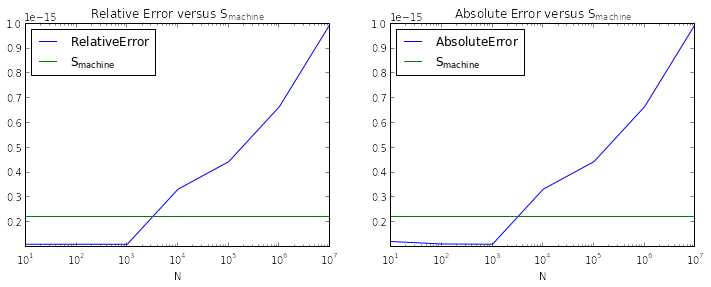

In [6]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
#        Also, do not forget to label your plot

# INSERT CODE HERE
x = [];
y1 = [];
y2 = [];
y3 = [];
for n in range(1,8):
    x = x + [10**(n)]
    y1 = y1 + [abs(sum_1(10**n)-sum_2(10**n))]
    y2 = y2 + [abs((sum_1(10**n)-sum_2(10**n))/sum_2(10**n))]
    y3 = y3 + [numpy.finfo(float).eps]
plt.subplot(1, 2, 1)
plt.semilogx(x,y1,x,y3)
plt.title('Relative Error versus $\epsilon_{machine}$')
plt.xlabel('N')
plt.legend(["$Relative Error$", "$\epsilon_{machine}$"], loc=2)
plt.subplot(1, 2, 2)
plt.semilogx(x,y2,x,y3)
plt.title('Absolute Error versus $\epsilon_{machine}$')
plt.xlabel('N')
plt.legend(["$Absolute Error$", "$\epsilon_{machine}$"], loc=2)

plt.show()

**(d)** (5) Theorize what may have lead to the differences in answers.

Solution: Because the floating point arithmetic is not communitative or associative.

Assume that, there are a simple arithmetic $\delta < \epsilon_{\text{machine}}$

 $$\frac{1}{n} - \frac{1}{n+1} = \frac{1}{n (n + 1)} + \delta $$
 
 $$\sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^N_{n=1} (\frac{1}{n (n + 1)} + \delta) = \sum^N_{n=1} \frac{1}{n (n + 1)} + \sum^N_{n=1} {\delta}$$
 
 Therefore, $$\sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] - \sum^N_{n=1} (\frac{1}{n (n + 1)}) = \sum^N_{n=1} {\delta}$$

## Question 3

Following our discussion in lecture regarding approximating $e^x$ again consider the Taylor polynomial approximation:

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

**(a)** Derive the upper bound on the *relative error* assuming that $x > 0$ and

$$R_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$R_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

$$R_n = \frac{|e^x - T_n(x)|}{|e^x|} = \frac{|R_n(x)|}{|e^x|} = \frac{f^{(n+1)}(c) \cdot (x-x_o)^{n+1}}{(n+1)! \cdot|e^x|} = \frac{e^c \cdot (x-x_o)^{n+1}}{(n+1)! \cdot|e^x|} $$

since $c < x$ and $x_0 < x$
$$\frac{e^c \cdot (x-x_o)^{n+1}}{(n+1)! \cdot|e^x|} \leq  \frac{x^{n+1}}{(n+1)! } $$

**(b)** Show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

To proof, the condition of 
$$\frac{x^{n+1}}{(n + 1)!} <  \epsilon_{\text{machine}}$$ 
is $n > e \cdot x$

$$\frac{x^{n+1}}{(n + 1)!} <  \epsilon_{\text{machine}}$$

$${x^{n+1}} < {(n + 1)!} \cdot \epsilon_{\text{machine}}$$

$$(n+1) \cdot log(x) < (n+1) \cdot log(n+1) - (n+1) + log(\epsilon_{\text{machine}})$$

$$log(x) < log(n+1) - 1 - \frac{log(\epsilon_{\text{machine}})}{n+1}$$

$$log(x) + 1 < log(n+1)$$

When $x$ and $n$ are large: $log(n+1) \approx log(n)$

$$log(e \cdot x) < log(n)$$

$$n > e \cdot x$$

**(c)** Write a Python function that accurately computes $T_n$ to the specified relative error tolerance and returns both the estimate on the range and the number of terms in the series needed over the interval $[-2, 2]$.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$.

Make sure to document your code including expected inputs, outputs, and assumptions being made.

In [9]:
# HINT: Think about how we evaluated polynomials efficiently in class

import scipy.misc as misc
import math

def Tn_exp(x, tolerance=1e-3):

    MAX_N = 100
    
    # INSERT CODE HERE
    Tn = 0.0
    for N in range(MAX_N):
        Tn = Tn + x**N/math.factorial(N)
        if numpy.all(abs(Tn - math.exp(x)) < tolerance):
            break;
    
    return Tn, N

In [10]:
x = numpy.linspace(-2, 2, 100)
tolerance = 8.0 * numpy.finfo(float).eps
answer, N = Tn_exp(x, tolerance=tolerance)
assert(numpy.all(numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance))
print "Success!"

TypeError: only length-1 arrays can be converted to Python scalars

## Question 4

Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\cosh \Delta x = 1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).
